# 神经网络


详解神经网络的过程


之前我们知道用卷积神经网络做图片识别，可是卷积神经网络是怎么工作的呢？

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

# 读取一张图片


图片按照320×320输出

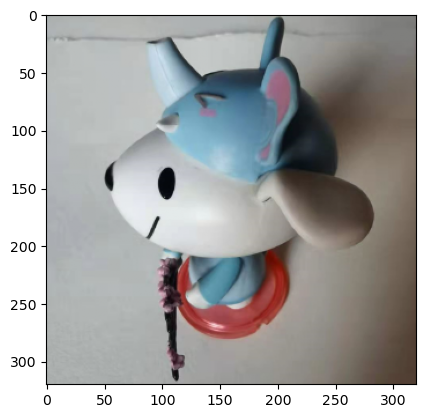

(320, 320, 3)

In [34]:
img = cv2.imread('doll.png')
b,g,r = cv2.split(img) # cv2是bgr而不是rgb，所以需要重新排列
img = cv2.merge([r,g,b])
img = cv2.resize(img, (320, 320))
img = img / 255.0
plt.imshow(img)
plt.show()
img.shape

In [35]:
img

array([[[0.6627451 , 0.67843137, 0.6745098 ],
        [0.6627451 , 0.67843137, 0.6745098 ],
        [0.6627451 , 0.67843137, 0.6745098 ],
        ...,
        [0.49019608, 0.49019608, 0.48235294],
        [0.49803922, 0.48235294, 0.47843137],
        [0.49803922, 0.48235294, 0.47843137]],

       [[0.6627451 , 0.68627451, 0.67843137],
        [0.6627451 , 0.68627451, 0.67843137],
        [0.6627451 , 0.68627451, 0.67843137],
        ...,
        [0.49019608, 0.49019608, 0.48235294],
        [0.49019608, 0.48627451, 0.47843137],
        [0.49019608, 0.48627451, 0.47843137]],

       [[0.6627451 , 0.69019608, 0.69019608],
        [0.6627451 , 0.68627451, 0.68627451],
        [0.6627451 , 0.68627451, 0.68627451],
        ...,
        [0.49019608, 0.49019608, 0.48235294],
        [0.49019608, 0.48627451, 0.47843137],
        [0.49019608, 0.48627451, 0.47843137]],

       ...,

       [[0.6627451 , 0.67843137, 0.6745098 ],
        [0.66666667, 0.68235294, 0.67843137],
        [0.67843137, 0

# 卷积神经网络


我们就把图片输入到卷积神经网络中


## 卷积


- filters: 输出空间的维度
- kernel_size: 卷积核的宽高，可以数组或者元祖，如果宽高一样可以是一个整数
- strides: 步长，卷积在宽高的步长
- padding: 边界，string类型的SAME或VALID，不区分大小写，SAME代表了上下左右的边界补0，VALID代表没有边界
- activation: 激活函数，一般使用ReLU作为激活函数
- dilation_rate: 膨胀率，卷积中间补0，膨胀率和步长不能同时大于1

In [9]:
tf.keras.backend.set_floatx('float64')
conv1 = tf.keras.layers.Conv2D(16, 2, input_shape=(320,320,3))
img_conv1 = conv1(tf.reshape(img, (1, 320, 320, 3)))
img_conv1.shape

TensorShape([1, 319, 319, 16])

输入的是320×320的三通道的1张图片


因为```filters=16```，所以输出了16张图片


> 注意，之前的3代表的是RGB三通道，现在的16代表了16个不同的卷积后的图片


返回的是319×319的16张图片，图片如下

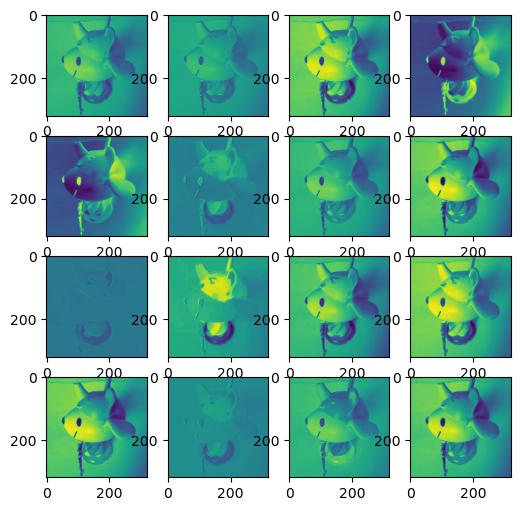

In [10]:
fig, axes = plt.subplots(4, 4, figsize=(6,6))
for m in range(4):
  for n in range(4):
    axes[m, n].imshow(img_conv1[0,:,:,m*4 + n])
plt.show()

现在把kernel_size设置为4，步长设置为2，并且增加了relu为激活函数

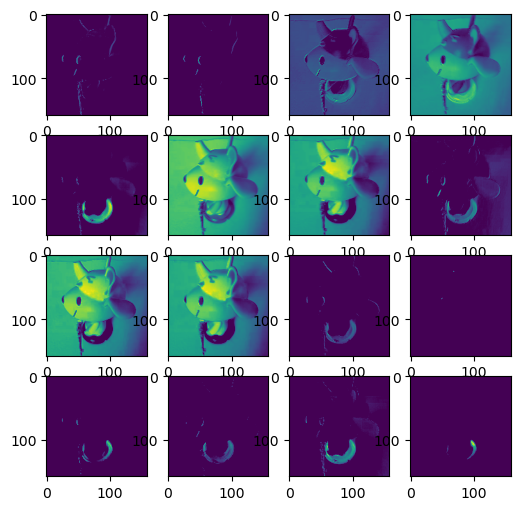

TensorShape([1, 158, 158, 16])

In [11]:
conv2 = tf.keras.layers.Conv2D(16, 4, 2, activation=tf.nn.relu)
img_conv2 = conv2(img_conv1)
fig, axes = plt.subplots(4, 4, figsize=(6,6))
for m in range(4):
  for n in range(4):
    axes[m, n].imshow(img_conv2[0,:,:,m*4 + n])
plt.show()
img_conv2.shape

因为步长为2，所以尺寸从之前的319减少到了158，少了一半


因为设置了relu激活函数，所以很多数据没到阈值直接变成0，所以很多图片直接“黑”了，因为0是黑色


## 池化


池化是为了防止过拟合，表现效果就是尺寸更小

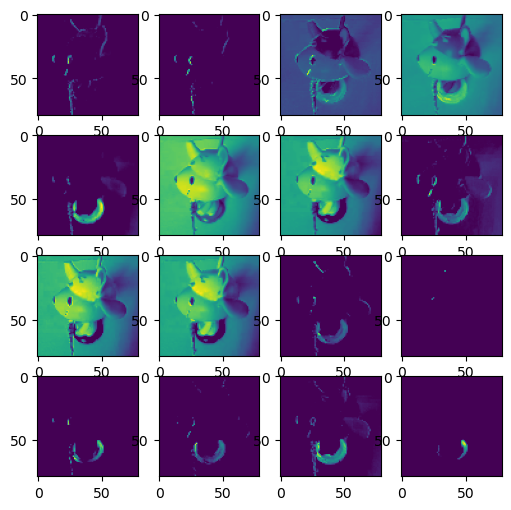

TensorShape([1, 79, 79, 16])

In [12]:
pool1 = tf.keras.layers.MaxPool2D()
img_pool1 = pool1(img_conv2)
fig, axes = plt.subplots(4, 4, figsize=(6,6))
for m in range(4):
  for n in range(4):
    axes[m, n].imshow(img_pool1[0,:,:,m*4 + n])
plt.show()
img_pool1.shape


池化之后从之前的158降低到了79


再来一次卷积和池化，并且把深度加到64

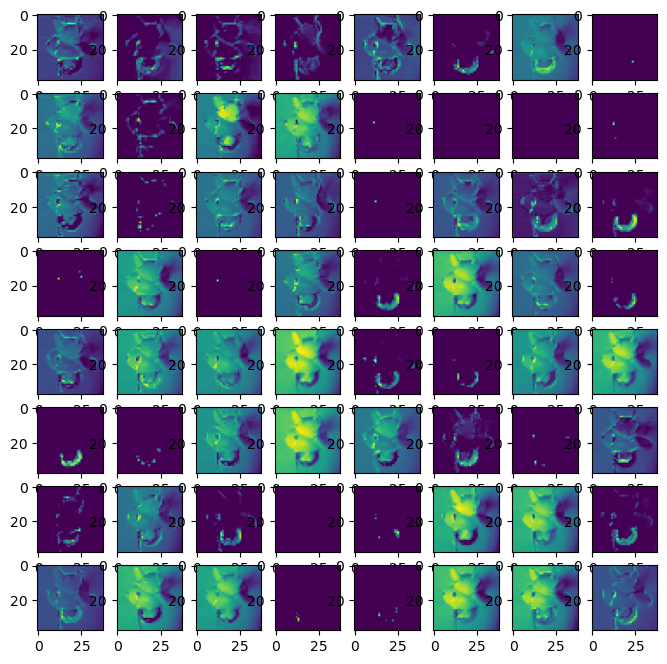

TensorShape([1, 38, 38, 64])

In [18]:
conv3 = tf.keras.layers.Conv2D(32, 2, activation='relu')
img_conv3 = conv3(img_pool1)
conv4 = tf.keras.layers.Conv2D(64, 2, activation='relu')
img_conv4 = conv4(img_conv3)
pool2 = tf.keras.layers.MaxPool2D()
img_pool2 = pool2(img_conv4)
fig, axes = plt.subplots(8, 8, figsize=(8,8))
for m in range(8):
  for n in range(8):
    axes[m, n].imshow(img_pool2[0,:,:,m*8 + n])
plt.show()
img_pool2.shape

## flatten


现在要把38×38×64的三维向量拉平，变成一维向量，计算机算的数据需要是一维

In [20]:
img_flatten = tf.keras.layers.Flatten()(img_pool2)
img_flatten.shape

TensorShape([1, 92416])

## 全链接


最后使用dense创建选链接，unit设置为多少就会变成多少个数据

In [22]:
img_dense1 = tf.keras.layers.Dense(32, activation=tf.nn.relu)(img_flatten)
img_dense1.shape

TensorShape([1, 32])

比如最终的图片分类是10个，那么最终就设置10个单位，一般留一个梯度，缓缓下降到最终的单位

In [43]:
cls = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(img_dense1)
cls

<tf.Tensor: shape=(1, 10), dtype=float64, numpy=
array([[0.0998901 , 0.09763801, 0.09610229, 0.10639109, 0.12393067,
        0.08850211, 0.09905299, 0.08858827, 0.10362383, 0.09628064]])>

可以看到，cls中的10个数据，就代表了每一个分类的概率

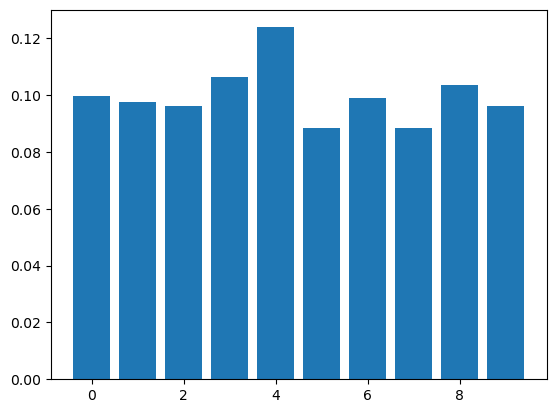

In [44]:
plt.bar(range(10), cls[0])
plt.show()